# Проект "Ненужные Вещи"

# Описание

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Датасет **mobile_dataset.csv** содержит колонки:
* `event.time` — время совершения
* `event.name` — название события
* `user.id` — идентификатор пользователя

Датасет **mobile_sources.csv** содержит колонки:
* `userId` — идентификатор пользователя
* `source` — источник, с которого пользователь установил приложение

Расшифровки событий:
* `advert_open` — открытие карточки объявления
* `photos_show` — просмотр фотографий в объявлении
* `tips_show` — пользователь увидел рекомендованные объявления
* `tips_click` — пользователь кликнул по рекомендованному объявлению
* `contacts_show` и `show_contacts` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления
* `contacts_call` — пользователь позвонил по номеру телефона на карточке объявления
* `map` — пользователь открыл карту размещенных объявлений
* `search_1` — `search_7` — разные события, связанные с поиском по сайту
* `favorites_add` — добавление объявления в избранное

# Декомпозиция проекта
##  Изучение датасетов
* Открыть датасеты и осмотреть содержимое
* На основе доступной информации преступать к этапу предобработки

##  Предобработка
* Привести названия столбцов к единому регистру
* Объединить датасеты по общему id для удобства работы
* Привести столбец с датой и временем к читабельному виду
* Проверить датасет на наличие явных и неявных дубликатов
* Проверить датасет на наличие пропусков значений

##  Исследовательский анализ данных
###  Выделить группы пользователей, которые отличаются по метрикам:
* retention rate
* Проведенное время в приложении
* Частота совершения событий
* Конверсия в целевое действие contacts_show

###  Сегментировать пользователей для определения целевой аудитории, чтобы адаптировать приложение:
* Распределить на группы по источникам скачивания приложения
* Для каждой группы посчитать Retention rate
* Для каждой группы посчитать конверсию
* Визуализировать различия групп для понимания разницы

##  Проверить статистические гипотезы:
* Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверить гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.
* Моя гипотеза: пользователи, которые добавляют товар в избранное и которые не добавляют, имеют разную конверсию в цд

## Изучение данных

In [1]:
#Импорт необходимых библиотек для работы с данными
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta
import numpy as np
import math as mth
from scipy import stats as st

from IPython.display import FileLink
import warnings

In [2]:
#Для снятия ограничений
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1) 
warnings.filterwarnings("ignore")

/tmp/ipykernel_64/515963861.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
#Откроем датасеты и посмотрим содержимое
mobile_sources = pd.read_csv()
mobile_dataset = pd.read_csv()

display(mobile_sources.head(10))
display(mobile_dataset.head(10))

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
5,17f6b2db-2964-4d11-89d8-7e38d2cb4750,yandex
6,62aa104f-592d-4ccb-8226-2ba0e719ded5,yandex
7,57321726-5d66-4d51-84f4-c797c35dcf2b,google
8,c2cf55c0-95f7-4269-896c-931d14deaab5,google
9,48e614d6-fe03-40f7-bf9e-4c4f61c19f64,yandex


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
5,2019-10-07 00:01:19.993624,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
6,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
7,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
8,2019-10-07 00:01:49.732803,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
9,2019-10-07 00:01:54.958298,advert_open,020292ab-89bc-4156-9acf-68bc2783f894


In [4]:
display('mobile_sources', mobile_sources.info())
display('mobile_dataset',mobile_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


'mobile_sources'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


'mobile_dataset'

None

<div style="border:solid green 2px; padding: 20px">
    Датасеты нуждаются в предобработке. Необходимо привести названия столбцов к единому регистру, столбец с датой и временем в читаемый вид, для удобства объединить датасеты по полю id пользователей, а так же проверить на пропуски и наличие дубликатов в строках

## Предобработка данных

### Приведем названия столбцов обоих датасетов к единому виду

In [5]:
#Переименуем слобцы датасета mobile_sources
mobile_sources = mobile_sources.rename(columns = {
    'userId': 'user_id'
})

#Переименуем столбцы датасета mobile_dataset
mobile_dataset = mobile_dataset.rename(columns = {
    'event.time': 'event_time', 'event.name': 'event_name', 'user.id': 'user_id'
})

#Выведем таблицы на экран для проверки
display(mobile_sources.head())
display(mobile_dataset.head())

,user_id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


,event_time,event_name,user_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


### Объединим таблицы в единый датасет для дальнейшей работы с ним

In [6]:
#Соединим таблицы
dataset_sources = mobile_sources.merge(mobile_dataset)
dataset_sources.head()

,user_id,source,event_time,event_name
0,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:00.431357,advert_open
1,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:01.236320,tips_show
2,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:07.039334,tips_show
3,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:27.770232,advert_open
4,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:34.804591,tips_show


### Поработаем с датой и временем. Приведу этот столбец в человеческий вид

In [7]:
#Укажем правильный формат даты и времени
dataset_sources['event_time'] = pd.to_datetime(dataset_sources['event_time'], format=('%Y.%m.%d %H:%M:%S'))

#Милисекунды ни в какую не хотели удаляться, пришлось сделать так...
dataset_sources['event_time'] = dataset_sources['event_time'].astype(str).str[:-7]
dataset_sources['event_time'].head()

0    2019-10-07 00:00:00
1    2019-10-07 00:00:01
2    2019-10-07 00:00:07
3    2019-10-07 00:01:27
4    2019-10-07 00:01:34
Name: event_time, dtype: object

### Проверим датасет на наличие явных и неявных дубликатов, а так же пропуски

In [8]:
#Доля пропусков по всему датасету
pd.DataFrame(round(dataset_sources.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
user_id,0.000000
source,0.000000
event_time,0.000000
event_name,0.000000


<div style="border:solid green 2px; padding: 20px">
Удивительно, в датасете нет пропущенных значений...

In [9]:
#Выведем общее количество дублей
print('Количество дубликатов в датасете:', dataset_sources.duplicated().sum())

Количество дубликатов в датасете: 1143


In [10]:
#Рассмотрим дубликаты более детально
print('Дубликаты в id пользователя:', dataset_sources['user_id'].duplicated().sum())

Дубликаты в id пользователя: 69904


<div style="border:solid green 2px; padding: 20px">
    Считаю это нормой, потому что механика распределения id пользователей допускает возможность попадания одного id сразу в несколько категорий событий, а значит эти повторения не являются сбоем в данных, или какой-либо иной девиацией.

In [11]:
#Проверим уникальные значения в столбце source, чтобы убедиться в отсутсвии неявных дублей
dataset_sources['source'].unique()

array(['other', 'yandex', 'google'], dtype=object)

In [12]:
#Выведем уникальные значения названий событий
dataset_sources['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'tips_click', 'search_4',
       'search_2', 'search_5', 'contacts_show', 'search_6', 'photos_show',
       'search_1', 'search_3', 'favorites_add', 'contacts_call',
       'search_7', 'show_contacts'], dtype=object)

<div style="border:solid green 2px; padding: 20px">
    Значения contacts_show и show_contacts обозначают одно и то же действие, а именно просмотр контактов в карточке товара. Предлагаю заменить одно название на другое, для большего удобства работы с данными

In [13]:
#Заменим значения
dataset_sources = dataset_sources.replace('contacts_show', 'show_contacts')
display(dataset_sources['event_name'].unique())
display(dataset_sources.info())
display(dataset_sources.head())

array(['advert_open', 'tips_show', 'map', 'tips_click', 'search_4',
       'search_2', 'search_5', 'show_contacts', 'search_6', 'photos_show',
       'search_1', 'search_3', 'favorites_add', 'contacts_call',
       'search_7'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     74197 non-null  object
 1   source      74197 non-null  object
 2   event_time  74197 non-null  object
 3   event_name  74197 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


None

,user_id,source,event_time,event_name
0,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:00,advert_open
1,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:01,tips_show
2,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:07,tips_show
3,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:27,advert_open
4,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:34,tips_show


<div style="border:solid green 2px; padding: 20px">
После предобработки датасет готов к дальнейшей работе с данными. Откорректирована дата, проверены дубликаты и пропуски в строках, названия столбцов приведены к единому регистру, а одинаковые значения событий столбца имеющище разные названия объединены для комфортной работы.

## Исследовательский анализ данных

### Узнаем, за какой период времени мы обладаем полными данными

'Начало выборки: 2019-10-07 00:00:00 Конец выборки: 2019-11-03 23:58:12'

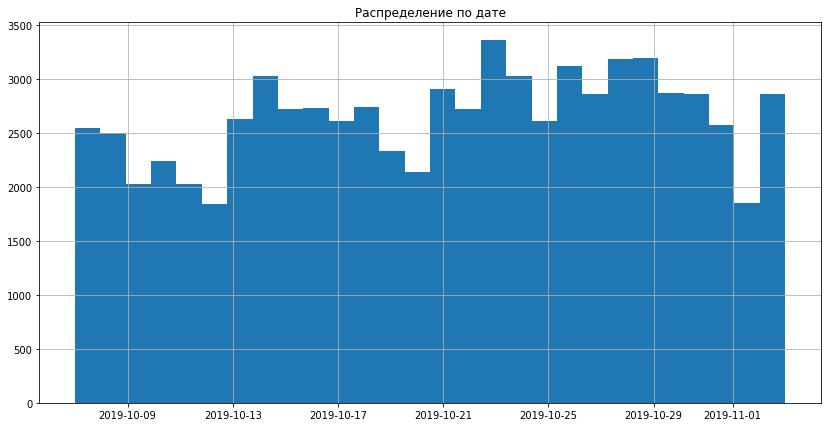

In [14]:
#Выведем информацию о самой первой дате и последней
display(f'Начало выборки: {dataset_sources["event_time"].min()} Конец выборки: {dataset_sources["event_time"].max()}')

#Создадим новый столбец с датой, по нему построим гистограмму
dataset_sources['date'] =  pd.to_datetime(dataset_sources['event_time'], format='%Y.%m.%d')
dataset_sources['date'] =  pd.to_datetime(dataset_sources['date'].dt.date)

#Выстроим гистрограмму по дням
plt.title('Распределение по дате')
dataset_sources['date'].hist(bins=28, figsize=(14, 7))
plt.show()

### Сделаю группировку по событиям в приложении, посчитав количество пользователей совершивших каждое событие (за весь период времени)

In [15]:
#Запишем это дело в отдельную сводную таблицу
event_users = dataset_sources.groupby(['event_name']).agg({'user_id': 'count'}).sort_values(by='user_id', ascending=False).reset_index()
event_users.head()

,event_name,user_id
0,tips_show,40055
1,photos_show,10012
2,advert_open,6164
3,show_contacts,4529
4,map,3881


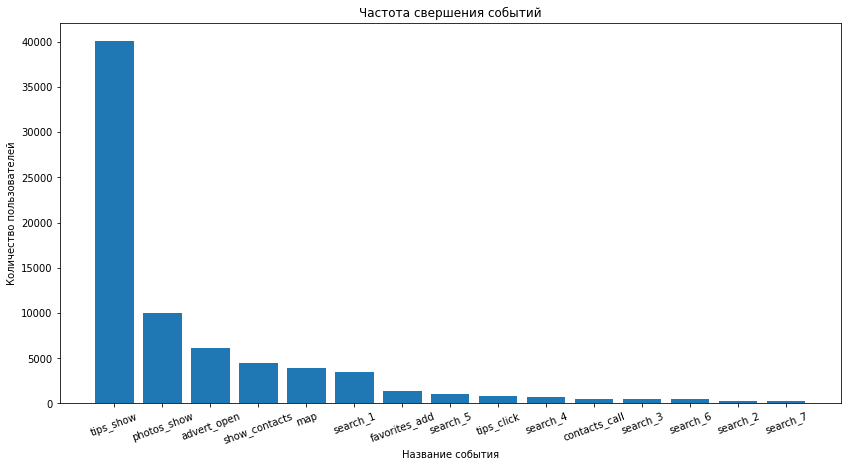

In [16]:
#Построим гистограмму отображающую распределение событий
fig = plt.figure(figsize=(14, 7))

plt.bar(event_users['event_name'], event_users['user_id'])
plt.xlabel('Название события')
plt.ylabel('Количество пользователей')
plt.title('Частота свершения событий')
plt.xticks(rotation=20)

plt.show()

<div style="border:solid green 2px; padding: 20px">
 График частоты свершения событий указывает нам, что подавляющее большинство посетителей видят рекомендованные объявления (40055 пользователей), но при этом, открывают его всего 6164 пользователей, что говорит о неверно настроенном таргете в приложении на целевую аудиторию. Поисковые действия (3, 6, 2, 7) показывают наименьшую частоту свершения, что говорит о случайности этих событий. Предполагаю, что группы search_1 - 7 являются контрольными для проведения АБ тестирования, возможно они разделены по категориям поиска товара (к каждой группе определенная категория), но узнать мы это никак не сможем ибо не обладаем необходимой информацией.

### Рассмотрим динамику частоты действий пользователей, для понимания поведения.

Возьмем за активность пользователя событие tips_show (увидел объявление) т.к. это самое первое с чего начинается метрика в датафрейме. Отсортировав датафрейм по этому событию, можно выявить активность пользователей от начала выборки до конца.

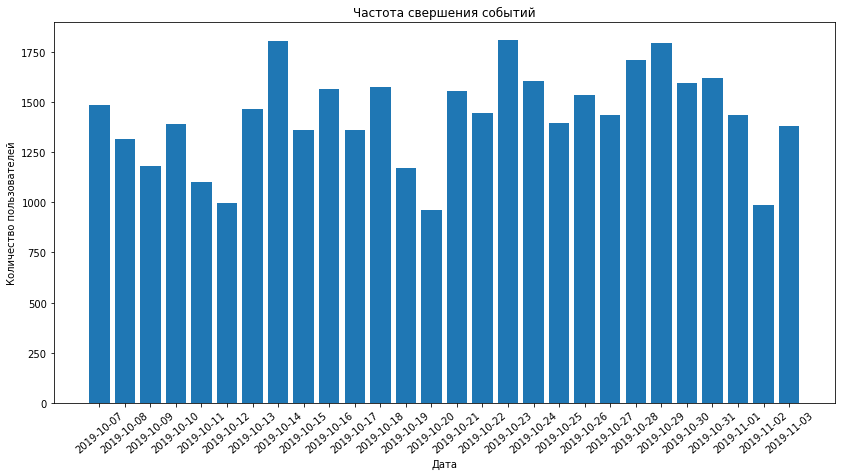

In [17]:
#Сделаем сводную таблицу с количеством событий на каждый день датафрейма
users_act = dataset_sources[dataset_sources['event_name'] == 'tips_show']
users_act = users_act.groupby(['date']).agg({'event_name': 'count'}).reset_index()
users_act.head()

#построим график по этой таблице
fig = plt.figure(figsize=(14, 7))

plt.bar(users_act['date'][::1], users_act['event_name'][::1], width=0.8)
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.title('Частота свершения событий')
#plt.xticks(rotation=20)
plt.xticks(users_act['date'], rotation=40)

plt.show()

<div style="border:solid green 2px; padding: 20px">
    Таким образом, мы получили график с активностью пользователей в каждый отдельный день выборки. Минимальная дата 2019-10-07 понедельник, исходя из этого можно анализировать полученные данные по дням недели. Таким образом видно, что в начале каждой недели активность пользователей выше чем к концу до 2019-10-19 (воскресенье), далее наблюдается повышение активности примерно ровным фоном в каждый день что можно объяснить приближающимися новогодними праздниками.

### Посчитаем, сколько времени суммарно провел каждый пользователь в приложении

In [18]:
#Сортировка данных по столбцу 'user_id' и 'event_time'
sort_id = dataset_sources.sort_values(by=['user_id', 'event_time'])

#Инициализация переменных
current_user = None
session_start_time = None
session_end_time = None
unique_users = []

#Перебор строк данных
for index, row in sort_id.iterrows():
    #Получение значений текущей строки
    user_id = row['user_id']
    event_time = pd.to_datetime(row['event_time'])

    #Если пользователь изменился, сохраняем информацию о предыдущей сессии
    if user_id != current_user:
        if current_user is not None and session_start_time is not None:
            session_duration = session_end_time - session_start_time
            unique_users.append((current_user, session_duration))

        #Обновление переменных для нового пользователя
        current_user = user_id
        session_start_time = event_time
        session_end_time = event_time
    else:
        #Обновление времени окончания сессии
        session_end_time = event_time

#Добавление информации о последней сессии
if current_user is not None and session_start_time is not None:
    session_duration = session_end_time - session_start_time
    unique_users.append((current_user, session_duration))

#Фильтрация уникальных пользователей по времени нахождения в приложении
filtered_users = [user_id for user_id, session_duration in unique_users if session_duration.total_seconds() > 30]

In [19]:
#Выведем на экран сводную таблицу
filtered_table = pd.DataFrame(unique_users, columns=['user_id', 'session_duration']).sort_values(by='session_duration', ascending=False)
filtered_table.head()

,user_id,session_duration
2596,9ab0044b-12c3-4fb3-9dec-9050f46397ed,26 days 20:45:24
2251,860bad3b-3925-43ef-909e-fc1a0d3abea6,26 days 20:43:23
3783,e0a19ff5-468c-4c47-8dc4-bc4eb9854a96,26 days 16:13:53
3487,d02f8f81-72f4-4f6b-ad5b-c021cf92b862,26 days 08:32:53
3240,c21daf1f-e787-4a5c-9d92-62cd3dafc9b3,26 days 07:15:36


<div style="border:solid green 2px; padding: 20px">
Таким образом, мы получили данные о суммарном времени проведения уникальными пользователями в приложении. Только, у меня возник вопрос - зачем?))) Когда я вывел таблицу, понял что в ответе на поставленные задачи она мне не поможет, графики с ней не информативны, и зачем я потратил день времени на форумы в поиске информации как это реализовать... Мне жаль стирать это, пусть будет, вдруг пригодится!

<div style="border:solid green 2px; padding: 20px">
Сегментируем пользователей на сессии равные 10 минутам, ведь для мобильных приложений временной интервал для сессий часто может быть установлен в 5-10 минут бездействия. Это связано с тем, что пользователи могут часто взаимодействовуют с мобильными приложениями.

In [20]:
#отсортируем даные по пользователям и времени
segmentation = dataset_sources.sort_values(['user_id', 'event_time']) 
segmentation['event_time'] = pd.to_datetime(segmentation['event_time'])

#Определим сессию в 10 минут, с накоплением суммы сессий
seg = (segmentation.groupby('user_id')['event_time'].diff() > pd.Timedelta('10Min')).cumsum()

#Создадим счетчик сессий пользователей
segmentation['session_id'] = segmentation.groupby(['user_id', seg], sort=False).ngroup() + 1

#Группируем данные и считаем разницу между максимальным и минимальным временем для каждой сессии.
session_durations = segmentation.groupby('session_id')['event_time'].apply(lambda x: x.max() - x.min())

#Создаем новый столбец и заполняем его суммарным временем для каждой сессии.
segmentation['session_duration'] = session_durations

#Находим минимальное и максимальное время для каждой сессии.
min_time = segmentation.groupby('session_id')['event_time'].min()
max_time = segmentation.groupby('session_id')['event_time'].max()

#Создаем новые столбцы и заполняем их значениями минимального и максимального времени для каждой сессии
segmentation['min_time'] = min_time
segmentation['max_time'] = max_time

display(segmentation.head(10))
display('Среднее время сессии:', segmentation['session_duration'].mean())

,user_id,source,event_time,event_name,date,session_id,session_duration,min_time,max_time
2171,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,tips_show,2019-10-07,1,0 days 00:10:52,2019-10-09 18:58:11,2019-10-09 19:09:03
2172,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31,tips_show,2019-10-07,1,0 days 00:00:00,2019-10-17 10:01:37,2019-10-17 10:01:37
2173,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:05,tips_show,2019-10-07,1,0 days 00:05:04,2019-10-17 10:12:04,2019-10-17 10:17:08
2174,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:20,tips_show,2019-10-07,1,0 days 00:04:47,2019-10-19 19:03:40,2019-10-19 19:08:27
2175,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:30,tips_show,2019-10-07,1,0 days 00:23:03,2019-10-19 19:46:48,2019-10-19 20:09:51
2176,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:43,tips_show,2019-10-07,1,0 days 00:18:46,2019-10-27 21:30:53,2019-10-27 21:49:39
2177,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:46:31,tips_show,2019-10-07,1,0 days 00:11:39,2019-10-08 12:20:51,2019-10-08 12:32:30
2178,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:47:32,tips_show,2019-10-07,1,0 days 00:10:26,2019-10-08 13:39:42,2019-10-08 13:50:08
2179,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:49:41,tips_show,2019-10-07,1,0 days 00:09:18,2019-10-10 20:12:22,2019-10-10 20:21:40
2180,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-09 18:33:55,map,2019-10-09,2,0 days 00:00:00,2019-10-21 21:13:35,2019-10-21 21:13:35


'Среднее время сессии:'

Timedelta('0 days 00:07:28.648672078')

In [21]:
segmentation['session_duration'].describe()

count    12689                    
mean     0 days 00:07:28.648672078
std      0 days 00:11:38.953204744
min      0 days 00:00:00          
25%      0 days 00:00:00          
50%      0 days 00:03:21          
75%      0 days 00:10:08          
max      0 days 03:12:23          
Name: session_duration, dtype: object

In [22]:
#Фильтруем сессии, у которых разница между минимальным и максимальным временем равна нулю
sessions_zero = segmentation[segmentation['min_time'] == segmentation['max_time']]

sessions_zero = sessions_zero[['session_id', 'event_name']]
#sessions_zero

zero_name = sessions_zero.groupby('event_name')['session_id'].count().sort_values(ascending=False).reset_index()
display(zero_name.head())

,event_name,session_id
0,tips_show,1762
1,photos_show,350
2,advert_open,286
3,map,242
4,show_contacts,208


<div style="border:solid green 2px; padding: 20px">
Сегментировав пользователей установлено среднее время сессии равное 00:07:28, а так же найдены нулевые сессии и отдельно выведена таблица с наиболее частыми названиями совершенных событий в этих сессиях. Таким образом, подавляющее большинство нулевых сессий связано с событием tips_show (просмотр рекомендованного объявления). Думаю, это связано с тем что просто напросто нет метрики отслеживающей время просмотра объявления пользователем. Считаю что счетчик времени рекомендации включается только при нажатии на рекламный баннер, и с этого момента регистрируется сессия. По остальным событиям могу предположить, что они имеют нулевое значение в силу быстрого скроллинга этих событий/ошибочного открытия какого-то из них

### Найдем retention rate

In [23]:
#Создадим профили пользователей
#Отсорируем значения
profiles = (dataset_sources.sort_values(by=['user_id', 'event_time'], ascending=True)
            .groupby('user_id')
            .agg({'event_time': 'first', 'source': 'first'})
            .rename(columns={'event_time': 'first_ts'}) #Первая активность пользователя
            .reset_index()
           )

#А еще понадобится столбец с датой
profiles['first_ts'] = pd.to_datetime(profiles['first_ts']) #Без преобразования работать отказывается
profiles['data'] = profiles['first_ts'].dt.date

#profiles.head()

In [24]:
#Присоединяем event_name к профилям по столбцу user_id
result_raw = profiles.merge(
    dataset_sources[['user_id', 'event_time']], on='user_id', how='left'
)

result_raw = result_raw.rename(columns={'event_time': 'session_start'}) #Переименуем это чтоб не запутаться...
result_raw['session_start'] = pd.to_datetime(result_raw['session_start']) #Та же история с преобзарованием
result_raw.head()

,user_id,first_ts,source,data,session_start
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,other,2019-10-07,2019-10-07 13:39:45
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,other,2019-10-07,2019-10-07 13:40:31
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,other,2019-10-07,2019-10-07 13:41:05
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,other,2019-10-07,2019-10-07 13:43:20
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,other,2019-10-07,2019-10-07 13:45:30


In [25]:
#Вычисляем лайфтайм каждой сессии в днях
result_raw['lifetime'] = (
    result_raw['session_start'] - result_raw['first_ts']
).dt.days

#result_raw.head()

In [26]:
#Строим таблицу удержания
result_grouped = result_raw.pivot_table(
    index=['data'], columns='lifetime', values='user_id', aggfunc='nunique'
)

#result_grouped #Это даже на первый взгляд корректно выглядит

In [27]:
#Вычисляем размеры когорт
cohort_sizes = (
    result_raw.groupby('data')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

#Объединяем размеры когорт и таблицу удержания
result_grouped = cohort_sizes.merge(
    result_grouped, on='data', how='left'
).fillna(0)

#Делим данные таблицы удержания на размеры когорт
result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0
).drop(columns=['cohort_size'])

#result_grouped

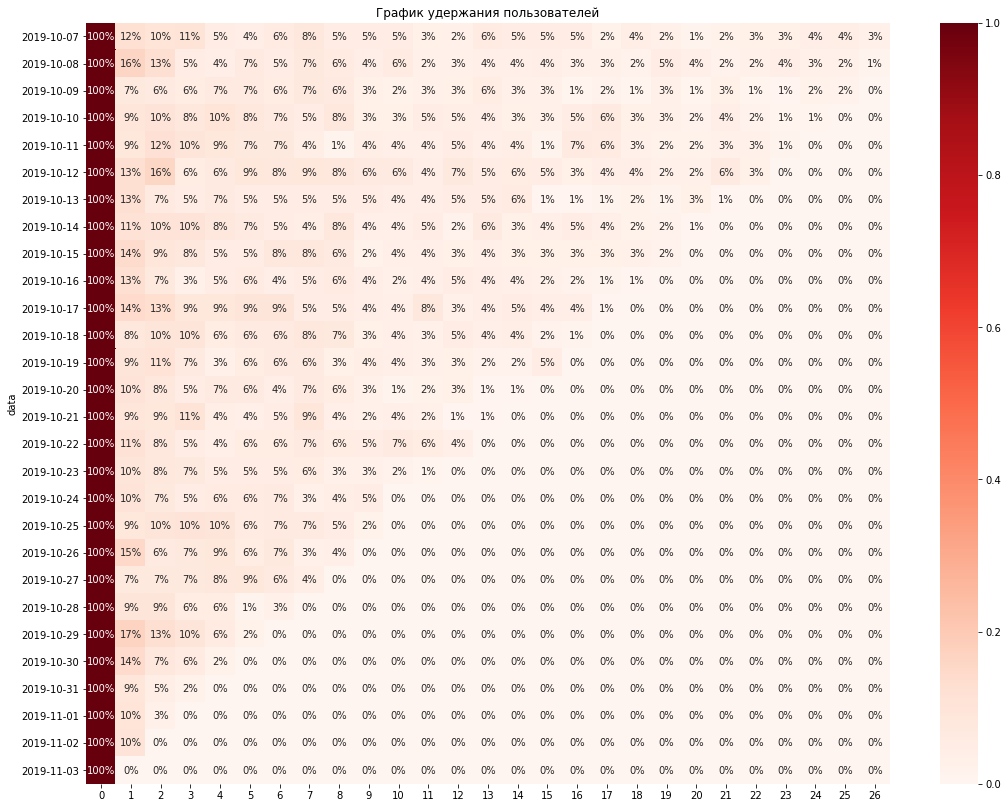

In [28]:
#График удержания пользователей
plt.figure(figsize=(18,14))
plt.title('График удержания пользователей')
ax = sns.heatmap(data=result_grouped, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(result_grouped.index)
fig=ax.get_figure()
fig.savefig("Retention_Rate.png")
plt.show()

<div style="border:solid green 2px; padding: 20px">
Глядя на таблицу общего удержания пользователей можно наблюдать немного печальную картину... Буквально на второй день нет показателя удержания выше 17%, а с каждым последующим количество пользователей убывает, я полагаю что это связано с подачей рекламы. Мне кажется, большинство людей пришедших в первый день по рекомендованному объявлению заходят в приложение просто из интереса, листают объявления, и больше не заходят. Это говорит о не точно настроенном таргете.

### Посмотрим, какая конверсия в целевое действие ('show_contacts') у пользователей.

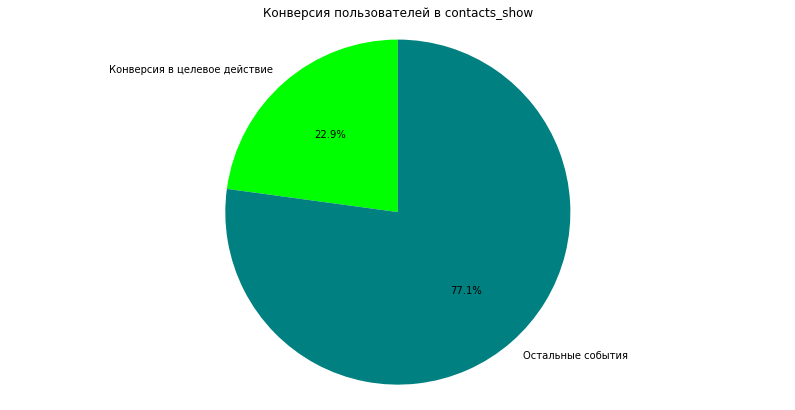

Конверсия в целевое действие "contacts_show": 22.85%


In [29]:
#Расчет количества пользователей, совершивших целевое действие 'show_contacts'
conversion_users = len(dataset_sources[dataset_sources['event_name'] == 'show_contacts']['user_id'].unique())

#Расчет общего количества пользователей
total_users = len(dataset_sources['user_id'].unique())

#Расчет конверсии в процентах
conversion_rate = (conversion_users / total_users) * 100

#Создание данных для круговой диаграммы
fig = plt.figure(figsize=(14, 7))
labels = ['Конверсия в целевое действие', 'Остальные события']
sizes = [conversion_rate, 100 - conversion_rate]
colors = ['#00ff00', '#008080']

#Сделаю круговую диаграмму
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Конверсия пользователей в contacts_show')

plt.show()

#Ну и выведу на экран доп информацию
print(f'Конверсия в целевое действие "contacts_show": {conversion_rate:.2f}%')

<div style="border:solid green 2px; padding: 20px">
    Показатель в 23% по моему мнению весьма хорош, для интернет-площадки. Можно предположить, что это связано с доверием пользователей к данному приложению.
    

<div style="border:solid green 2px; padding: 20px">
    Общее поведение пользователей показывает картину того, что рекомендованные объявления не настроены должным образом. Портрет пользователя на которого распространяется реклама не точен, отсюда низкие показатели retention rate, что подтверждает график. При этом, конверсия в целевое действие в 23% среди общего количества пользователей не плохой результат, но это можно улучшить путем воздествия на удержание пользователей а так же более точной настройкой трафика рекламы.

### Распределим пользователей на группы, по источникам скачивания приложения

Распределение пользователей на группы по источникам скачивания приложения поможет нам определить, на что сделать акцент последующих рекламных кампаний, это в свою очередь позволит повысить конверсию целевой аудитории! Я полагаю, что Яндекс браузер является фаворитом, т.к. мы имеем трафик пользователей проживающих в РФ и странах СНГ, а значит подавляющее большинство пользователей русскоговорящих, и пользуются Яндексом. Если моё предположение верно - значит целесообразно направить основные силы рекламы именно в Яндекс браузер для привлечения большего охвата пользователей.

,source,user_id
0,yandex,1934
1,other,1230
2,google,1129


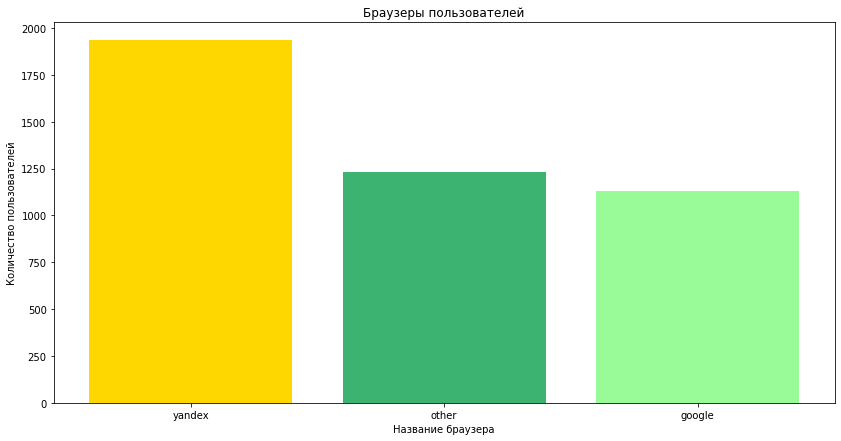

In [30]:
#Так же сделаю сводную таблицу для построения графика
sources_us_gr = dataset_sources.groupby('source')['user_id'].nunique().sort_values(ascending=False).reset_index()
display(sources_us_gr)

#Визуализируем информауию
fig = plt.figure(figsize=(14, 7))
colors = ['#ffd700', '#3cb371', '#98fb98']

plt.bar(sources_us_gr['source'], sources_us_gr['user_id'], color=colors)
plt.xlabel('Название браузера')
plt.ylabel('Количество пользователей')
plt.title('Браузеры пользователей')

plt.show()

<div style="border:solid green 2px; padding: 20px">
    Пользователей, скачивающие приложение с браузера Яндекса большинство. Объяснить это можно наибольшей популярностью данного браузера в РФ и странах СНГ, в силу акцентрирования работы с русскоговорящим населением.

### Рассчитаем для каждой группы Retention rate

In [31]:
#Создадим профили пользователей Яндекса
#Отсорируем значения
profiles_yandex = profiles.query("source == 'yandex'")

#А еще понадобится столбец с датой
profiles_yandex['first_ts'] = pd.to_datetime(profiles_yandex['first_ts']) #Без преобразования работать отказывается
profiles_yandex['data'] = profiles_yandex['first_ts'].dt.date

#Присоединяем event_name к профилям по столбцу user_id
result_raw = profiles_yandex.merge(
    dataset_sources[['user_id', 'event_time']], on='user_id', how='left'
)

result_raw = result_raw.rename(columns={'event_time': 'session_start'}) #Переименуем это чтоб не запутаться...
result_raw['session_start'] = pd.to_datetime(result_raw['session_start']) #Та же история с преобзарованием
#result_raw.head()

#Вычисляем лайфтайм каждой сессии в днях
result_raw['lifetime'] = (
    result_raw['session_start'] - result_raw['first_ts']
).dt.days

#Строим таблицу удержания
result_grouped = result_raw.pivot_table(
    index=['data'], columns='lifetime', values='user_id', aggfunc='nunique'
)

#Вычисляем размеры когорт
cohort_sizes = (
    result_raw.groupby('data')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

#Объединяем размеры когорт и таблицу удержания
result_grouped = cohort_sizes.merge(
    result_grouped, on='data', how='left'
).fillna(0)

#Делим данные таблицы удержания на размеры когорт
result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0
).drop(columns=['cohort_size'])

result_grouped

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
data,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-07,1.0,0.166667,0.100000,0.155556,0.066667,0.033333,0.066667,0.066667,0.055556,0.066667,0.066667,0.044444,0.033333,0.088889,0.044444,0.066667,0.055556,0.022222,0.066667,0.022222,0.011111,0.011111,0.022222,0.033333,0.022222,0.033333,0.033333
2019-10-08,1.0,0.135135,0.108108,0.040541,0.040541,0.054054,0.054054,0.094595,0.067568,0.027027,0.067568,0.027027,0.027027,0.013514,0.013514,0.027027,0.027027,0.013514,0.013514,0.040541,0.040541,0.013514,0.013514,0.027027,0.013514,0.027027,0.013514
2019-10-09,1.0,0.096386,0.072289,0.060241,0.012048,0.060241,0.012048,0.072289,0.060241,0.024096,0.024096,0.024096,0.012048,0.024096,0.012048,0.012048,0.000000,0.012048,0.000000,0.012048,0.012048,0.060241,0.012048,0.000000,0.000000,0.000000,0.000000
2019-10-10,1.0,0.098765,0.111111,0.086420,0.123457,0.086420,0.074074,0.049383,0.061728,0.012346,0.024691,0.024691,0.024691,0.037037,0.024691,0.024691,0.061728,0.024691,0.024691,0.024691,0.012346,0.061728,0.012346,0.012346,0.012346,0.000000,0.000000
2019-10-11,1.0,0.114286,0.142857,0.085714,0.128571,0.128571,0.114286,0.042857,0.028571,0.057143,0.028571,0.028571,0.057143,0.042857,0.028571,0.014286,0.057143,0.057143,0.028571,0.028571,0.014286,0.042857,0.028571,0.000000,0.000000,0.000000,0.000000
2019-10-12,1.0,0.152542,0.118644,0.050847,0.067797,0.050847,0.067797,0.101695,0.067797,0.050847,0.050847,0.033898,0.050847,0.033898,0.050847,0.033898,0.016949,0.050847,0.050847,0.000000,0.016949,0.050847,0.050847,0.000000,0.000000,0.000000,0.000000
2019-10-13,1.0,0.148148,0.074074,0.086420,0.098765,0.074074,0.037037,0.061728,0.061728,0.061728,0.049383,0.037037,0.049383,0.049383,0.074074,0.000000,0.012346,0.012346,0.037037,0.012346,0.024691,0.012346,0.000000,0.000000,0.000000,0.000000,0.000000
2019-10-14,1.0,0.105882,0.117647,0.070588,0.058824,0.023529,0.035294,0.035294,0.047059,0.023529,0.011765,0.035294,0.000000,0.047059,0.047059,0.023529,0.035294,0.011765,0.023529,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-10-15,1.0,0.174419,0.104651,0.093023,0.069767,0.069767,0.116279,0.093023,0.093023,0.034884,0.058140,0.069767,0.058140,0.034884,0.034884,0.046512,0.034884,0.023256,0.046512,0.011628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


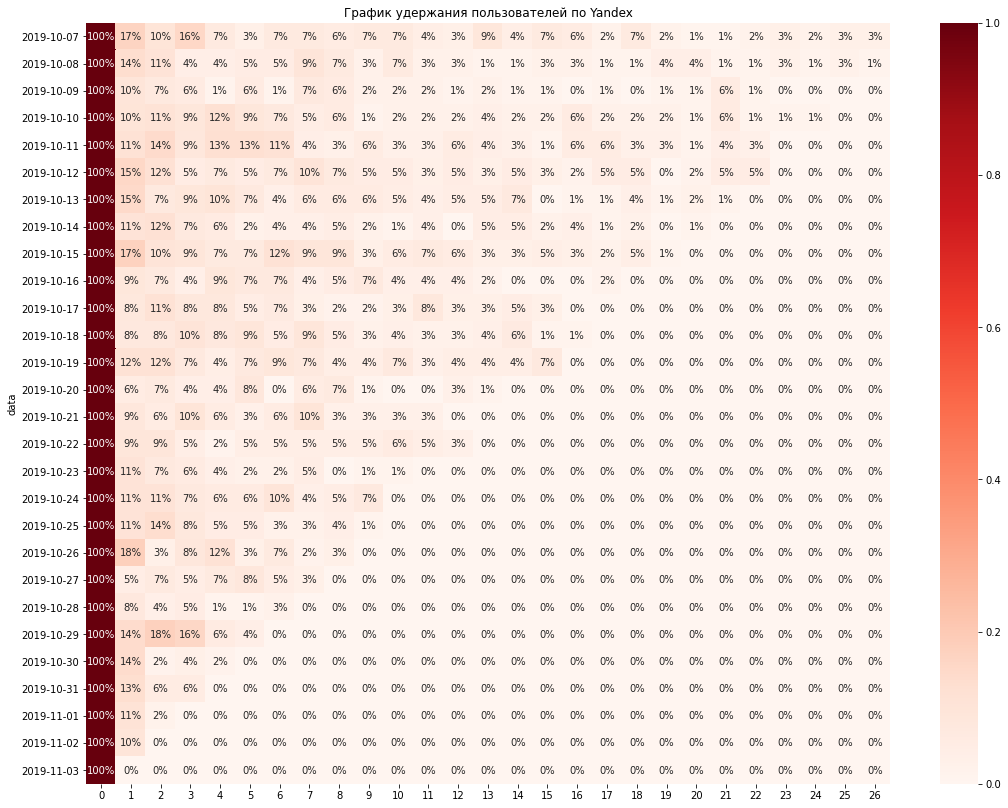

In [32]:
#График удержания пользователей
plt.figure(figsize=(18,14))
plt.title('График удержания пользователей по Yandex')
ax = sns.heatmap(data=result_grouped, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(result_grouped.index)
fig=ax.get_figure()
fig.savefig("Retention_Rate.png")
plt.show()

In [33]:
#Создадим профили пользователей Гугла
#Отсорируем значения
profiles_google = profiles.query("source == 'google'")

#А еще понадобится столбец с датой
profiles_google['first_ts'] = pd.to_datetime(profiles_google['first_ts']) #Без преобразования работать отказывается
profiles_google['data'] = profiles_google['first_ts'].dt.date

#Присоединяем event_name к профилям по столбцу user_id
result_raw = profiles_google.merge(
    dataset_sources[['user_id', 'event_time']], on='user_id', how='left'
)

result_raw = result_raw.rename(columns={'event_time': 'session_start'}) #Переименуем это чтоб не запутаться...
result_raw['session_start'] = pd.to_datetime(result_raw['session_start']) #Та же история с преобзарованием
#result_raw.head()

#Вычисляем лайфтайм каждой сессии в днях
result_raw['lifetime'] = (
    result_raw['session_start'] - result_raw['first_ts']
).dt.days

#Строим таблицу удержания
result_grouped = result_raw.pivot_table(
    index=['data'], columns='lifetime', values='user_id', aggfunc='nunique'
)

#Вычисляем размеры когорт
cohort_sizes = (
    result_raw.groupby('data')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

#Объединяем размеры когорт и таблицу удержания
result_grouped = cohort_sizes.merge(
    result_grouped, on='data', how='left'
).fillna(0)

#Делим данные таблицы удержания на размеры когорт
result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0
).drop(columns=['cohort_size'])

result_grouped

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
data,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-07,1.0,0.089286,0.053571,0.089286,0.035714,0.035714,0.071429,0.107143,0.053571,0.035714,0.035714,0.035714,0.017857,0.035714,0.035714,0.035714,0.035714,0.017857,0.035714,0.017857,0.035714,0.017857,0.035714,0.035714,0.035714,0.053571,0.035714
2019-10-08,1.0,0.243902,0.170732,0.048780,0.024390,0.000000,0.048780,0.048780,0.073171,0.048780,0.073171,0.000000,0.024390,0.073171,0.024390,0.024390,0.024390,0.000000,0.024390,0.073171,0.048780,0.024390,0.048780,0.073171,0.048780,0.024390,0.024390
2019-10-09,1.0,0.044444,0.044444,0.088889,0.066667,0.088889,0.066667,0.044444,0.000000,0.044444,0.022222,0.044444,0.066667,0.022222,0.066667,0.022222,0.022222,0.000000,0.022222,0.000000,0.000000,0.000000,0.000000,0.022222,0.022222,0.044444,0.000000
2019-10-10,1.0,0.085714,0.114286,0.028571,0.057143,0.028571,0.085714,0.057143,0.057143,0.057143,0.028571,0.057143,0.085714,0.057143,0.057143,0.057143,0.057143,0.085714,0.085714,0.028571,0.057143,0.028571,0.028571,0.000000,0.028571,0.000000,0.000000
2019-10-11,1.0,0.026316,0.026316,0.078947,0.026316,0.000000,0.052632,0.078947,0.000000,0.026316,0.078947,0.052632,0.052632,0.026316,0.026316,0.026316,0.052632,0.052632,0.026316,0.026316,0.026316,0.000000,0.026316,0.052632,0.000000,0.000000,0.000000
2019-10-12,1.0,0.029412,0.117647,0.058824,0.058824,0.117647,0.088235,0.088235,0.088235,0.117647,0.088235,0.029412,0.117647,0.058824,0.058824,0.029412,0.058824,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.000000,0.000000,0.000000,0.000000
2019-10-13,1.0,0.114286,0.057143,0.000000,0.057143,0.000000,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-10-14,1.0,0.142857,0.095238,0.166667,0.119048,0.071429,0.047619,0.071429,0.119048,0.047619,0.071429,0.095238,0.047619,0.071429,0.000000,0.047619,0.095238,0.071429,0.000000,0.023810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-10-15,1.0,0.125000,0.083333,0.062500,0.083333,0.041667,0.083333,0.041667,0.041667,0.020833,0.000000,0.000000,0.020833,0.020833,0.000000,0.000000,0.020833,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


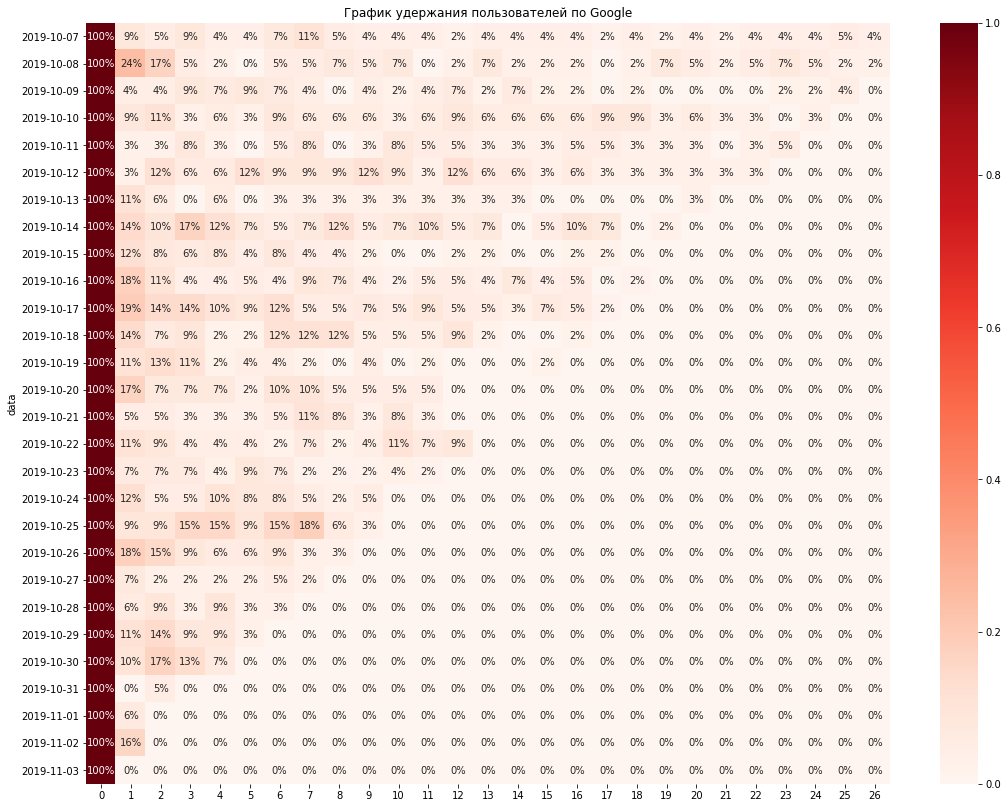

In [34]:
#График удержания пользователей
plt.figure(figsize=(18,14))
plt.title('График удержания пользователей по Google')
ax = sns.heatmap(data=result_grouped, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(result_grouped.index)
fig=ax.get_figure()
fig.savefig("Retention_Rate.png")
plt.show()

In [35]:
#Создадим профили пользователей прочих браузеров
#Отсорируем значения
profiles_other = profiles.query("source == 'other'")

#А еще понадобится столбец с датой
profiles_other['first_ts'] = pd.to_datetime(profiles_other['first_ts']) #Без преобразования работать отказывается
profiles_other['data'] = profiles_other['first_ts'].dt.date

#Присоединяем event_name к профилям по столбцу user_id
result_raw = profiles_other.merge(
    dataset_sources[['user_id', 'event_time']], on='user_id', how='left'
)

result_raw = result_raw.rename(columns={'event_time': 'session_start'}) #Переименуем это чтоб не запутаться...
result_raw['session_start'] = pd.to_datetime(result_raw['session_start']) #Та же история с преобзарованием
#result_raw.head()

#Вычисляем лайфтайм каждой сессии в днях
result_raw['lifetime'] = (
    result_raw['session_start'] - result_raw['first_ts']
).dt.days

#Строим таблицу удержания
result_grouped = result_raw.pivot_table(
    index=['data'], columns='lifetime', values='user_id', aggfunc='nunique'
)

#Вычисляем размеры когорт
cohort_sizes = (
    result_raw.groupby('data')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

#Объединяем размеры когорт и таблицу удержания
result_grouped = cohort_sizes.merge(
    result_grouped, on='data', how='left'
).fillna(0)

#Делим данные таблицы удержания на размеры когорт
result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0
).drop(columns=['cohort_size'])

result_grouped

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
data,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-07,1.0,0.086207,0.137931,0.051724,0.051724,0.051724,0.034483,0.068966,0.051724,0.034483,0.034483,0.017241,0.017241,0.034483,0.068966,0.034483,0.051724,0.017241,0.017241,0.034483,0.000000,0.034483,0.051724,0.034483,0.068966,0.051724,0.017241
2019-10-08,1.0,0.134615,0.115385,0.076923,0.057692,0.134615,0.057692,0.057692,0.038462,0.057692,0.038462,0.038462,0.038462,0.038462,0.076923,0.076923,0.038462,0.076923,0.019231,0.038462,0.019231,0.019231,0.019231,0.038462,0.038462,0.019231,0.000000
2019-10-09,1.0,0.062500,0.062500,0.020833,0.166667,0.062500,0.125000,0.104167,0.125000,0.041667,0.020833,0.020833,0.041667,0.145833,0.020833,0.062500,0.020833,0.041667,0.020833,0.083333,0.020833,0.020833,0.020833,0.000000,0.062500,0.020833,0.000000
2019-10-10,1.0,0.086207,0.086207,0.103448,0.086207,0.103448,0.051724,0.051724,0.120690,0.051724,0.051724,0.086207,0.051724,0.034483,0.034483,0.017241,0.034483,0.103448,0.017241,0.034483,0.000000,0.017241,0.017241,0.017241,0.000000,0.000000,0.000000
2019-10-11,1.0,0.107143,0.178571,0.142857,0.071429,0.035714,0.000000,0.000000,0.000000,0.035714,0.000000,0.035714,0.035714,0.035714,0.107143,0.000000,0.107143,0.071429,0.035714,0.000000,0.035714,0.035714,0.035714,0.000000,0.000000,0.000000,0.000000
2019-10-12,1.0,0.187500,0.281250,0.062500,0.062500,0.125000,0.093750,0.062500,0.093750,0.031250,0.062500,0.062500,0.062500,0.062500,0.062500,0.093750,0.031250,0.031250,0.031250,0.062500,0.031250,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-10-13,1.0,0.093750,0.062500,0.031250,0.000000,0.062500,0.125000,0.031250,0.031250,0.031250,0.031250,0.062500,0.062500,0.062500,0.062500,0.031250,0.000000,0.031250,0.000000,0.031250,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-10-14,1.0,0.103448,0.086207,0.103448,0.086207,0.137931,0.086207,0.034483,0.086207,0.051724,0.051724,0.034483,0.017241,0.086207,0.034483,0.051724,0.034483,0.051724,0.034483,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-10-15,1.0,0.096154,0.076923,0.076923,0.000000,0.038462,0.019231,0.076923,0.038462,0.000000,0.038462,0.019231,0.000000,0.057692,0.057692,0.038462,0.038462,0.057692,0.019231,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


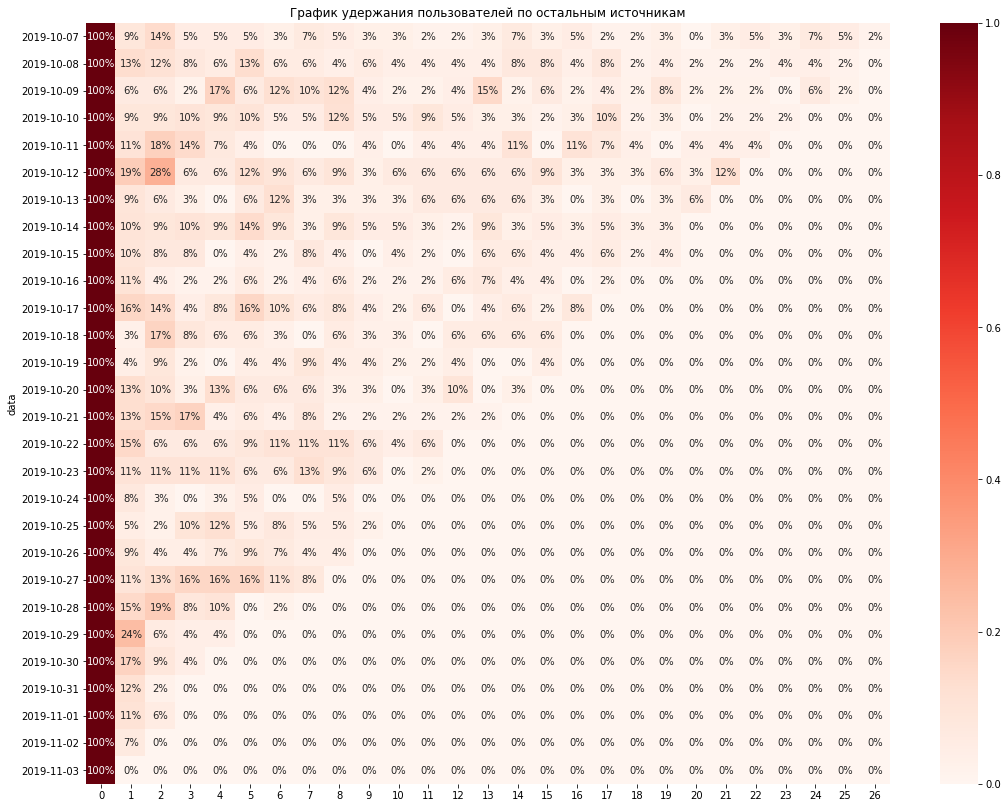

In [36]:
#График удержания пользователей
plt.figure(figsize=(18,14))
plt.title('График удержания пользователей по остальным источникам')
ax = sns.heatmap(data=result_grouped, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(result_grouped.index)
fig=ax.get_figure()
fig.savefig("Retention_Rate.png")
plt.show()

<div style="border:solid green 2px; padding: 20px">
В целом, нельзя выделить какой-то из источников как более превосходящий другие по показателю удержания пользователей. Каждый показывает плюс минус одинаковый результат, единственный момент - совокупность остальных источников хоть и меньше по численности пользователей в нем чем в браузере гугла и яндекса, но график удержания выдает результаты не меньше чем у сравниваемых.

### Посчитаем конверсию в целевое действие для каждой группы

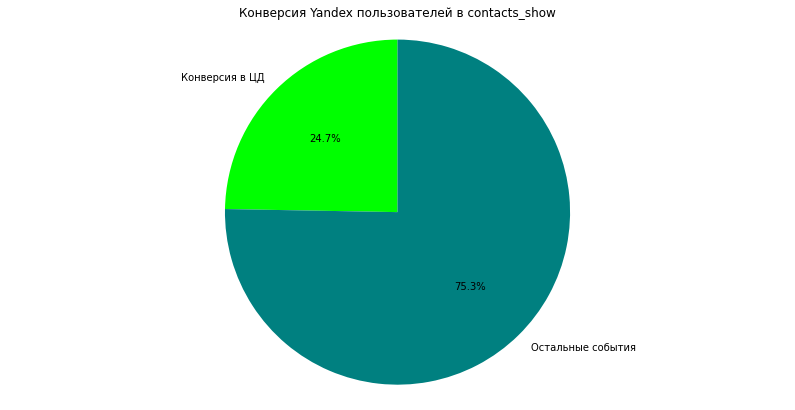

Конверсия в ЦД у Yandex: 24.72%


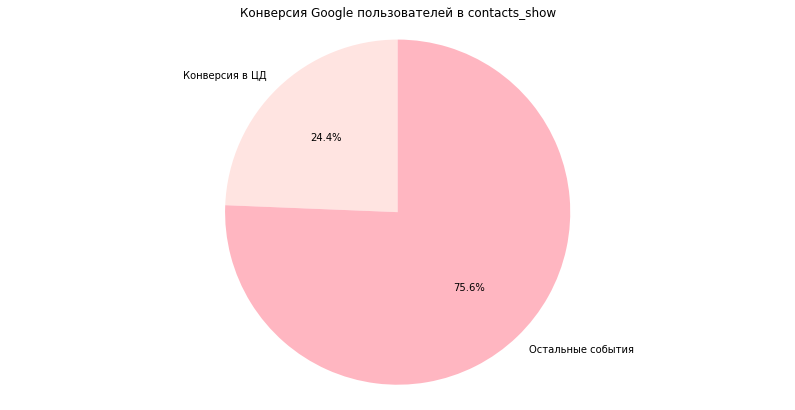

Конверсия в ЦД у Google: 24.36%


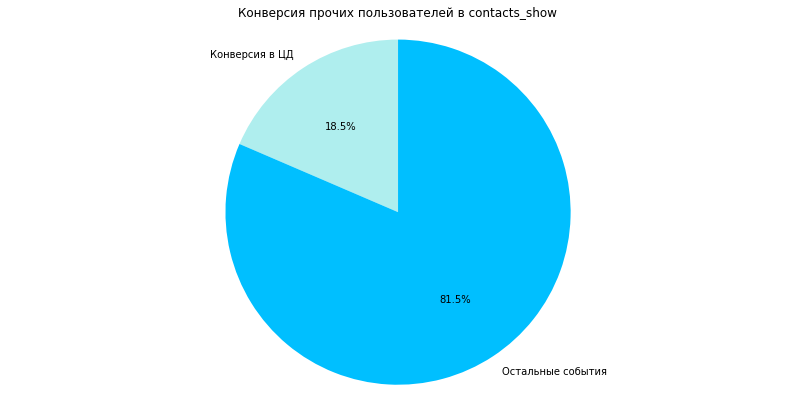

Конверсия ЦД у прочих браузеров: 18.54%


In [37]:
#Расчет количества уникальных пользователей, совершивших целевое действие 'show_contacts' для каждой группы
yandex_conversion = len(dataset_sources[(dataset_sources['event_name'] == 'show_contacts') & (dataset_sources['source'] == 'yandex')]['user_id'].unique())
google_conversion = len(dataset_sources[(dataset_sources['event_name'] == 'show_contacts') & (dataset_sources['source'] == 'google')]['user_id'].unique())
other_conversion = len(dataset_sources[(dataset_sources['event_name'] == 'show_contacts') & (dataset_sources['source'] == 'other')]['user_id'].unique())

#Так же добавлю общее количество пользователей в каждой группе
yandex_all_users = len(dataset_sources[(dataset_sources['source'] == 'yandex')]['user_id'].unique())
goolge_all_users = len(dataset_sources[(dataset_sources['source'] == 'google')]['user_id'].unique())
other_all_users = len(dataset_sources[(dataset_sources['source'] == 'other')]['user_id'].unique())

#Расчет конверсии в процентах для каждой группы отдельно
cr_yandex = (yandex_conversion / yandex_all_users) * 100
cr_google = (google_conversion / goolge_all_users) * 100
cr_other = (other_conversion / other_all_users) * 100

#Создание данных для круговой диаграммы
fig = plt.figure(figsize=(14, 7))
labels = ['Конверсия в ЦД', 'Остальные события']

sizes_yandex = [cr_yandex, 100 - cr_yandex]
sizes_google = [cr_google, 100 - cr_google]
sizes_other = [cr_other, 100 - cr_other]

colors_y = ['#00ff00', '#008080']
colors_g = ['#ffe4e1', '#ffb6c1']
colors_o = ['#afeeee', '#00bfff']

#Сделаю круговую диаграмму для яндекса
plt.pie(sizes_yandex, labels=labels, colors=colors_y, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Конверсия Yandex пользователей в contacts_show')
plt.show()
print(f'Конверсия в ЦД у Yandex: {cr_yandex:.2f}%')

#Сделаю круговую диаграмму для гугла
fig = plt.figure(figsize=(14, 7))
plt.pie(sizes_google, labels=labels, colors=colors_g, autopct='%1.1f%%', startangle=90) #autopct='%1.1f%%'
plt.axis('equal')
plt.title('Конверсия Google пользователей в contacts_show')
plt.show()
print(f'Конверсия в ЦД у Google: {cr_google:.2f}%')

#Сделаю круговую диаграмму для прочих
fig = plt.figure(figsize=(14, 7))
plt.pie(sizes_other, labels=labels, colors=colors_o, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Конверсия прочих пользователей в contacts_show')
plt.show()
print(f'Конверсия ЦД у прочих браузеров: {cr_other:.2f}%')

<div style="border:solid green 2px; padding: 20px">
По графикам видно что пользователи Яндекса лидируют по конверсии в ЦД, показывая результат в 24.7%. Это связано с наибольшим количеством пользователей скачавших приложение именно с Яндекса, на это так же может положительно влиять высокий коэффициент удежрания пользователей, поскольку чем он выше - тем больше вероятность того что пользователи совершат целевое действие.

<div style="border:solid green 2px; padding: 20px">
По конверсии в ЦД можно выделить группу Яндекса и Гугла на одном уровне, т.к. я считаю что различия между 24.7% и 24.3% не являются существенными, а значит отказываться от браузера Гугла не стоит в данном случае. Прочие браузеры показывают конверсию меньше, и учитывая факт более низкой конверсии + меньшего количества пользователей целесообразно адаптировать приложение для браузеров Яндекса и Гугла, а так же основной поток рекламы направить именно на них.

## Статистические гипотезы

Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверим гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов. Альтернативная: пользователи, которые добавляют товар в избранное и которые не добавляют, имеют разную конверсию в ЦД

Сформулируем выводы:
* H0 - Конверсия в просмотр контактов у обеих групп одинаковая
* Н1 - Конверсия в просмотр контактов у групп различается

In [38]:
#Сделаем сортировку по источнику привлечения
yandex_sort = dataset_sources.query('source == "yandex"')
google_sort = dataset_sources.query('source == "google"')

#Теперь сортировка по уникальным пользователям
yandex_sort_total = yandex_sort['user_id'].nunique()
google_sort_total = google_sort['user_id'].nunique()

#Сортировка по пользователям, совершившим целевое действие
yandex_conversion = yandex_sort.query('event_name == "show_contacts"')['user_id'].nunique()
google_conversion = google_sort.query('event_name == "show_contacts"')['user_id'].nunique()

#display(yandex_sort_total)
#display(google_sort_total)

In [39]:
#Проведем z тест
alpha = .05 # критический уровень статистической значимости

# пропорция успехов в первой группе:
p1 = yandex_conversion/yandex_sort_total

# пропорция успехов во второй группе:
p2 = google_conversion/google_sort_total

# пропорция успехов в комбинированном датасете:
p_combined = (yandex_conversion + google_conversion) / (yandex_sort_total + google_sort_total)

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/yandex_sort_total + 1/google_sort_total))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<div style="border:solid green 2px; padding: 20px">
Таким образом мы узнали, что у групп Яндекса и Гугла нет статистической разницы в конверсии пользователей в просмотры контактов

Проверим альтернативную гипотезу, сформулируем для нее выводы:
* Н0 - Пользователи добавляющие и не добавляющие товар в избранное имеют одинаковую конверсию в ЦД
* Н1 - Пользователи добавляющие и не добавляющие товар в избранное имеют разную конверсию в ЦД

In [40]:
#Тысячная попытка собрать пользователей которые не пересекаются
sort_add = dataset_sources.query("event_name in ['favorites_add', 'show_contacts']")
sort_not_add = dataset_sources.query("event_name != 'favorites_add'")

#Теперь сортировка по уникальным пользователям
total_add = sort_add['user_id'].nunique()
total_not_add = sort_not_add['user_id'].nunique()

#Сортировка по пользователям, совершившим целевое действие
add_conversion = sort_add.query('event_name == "show_contacts"')['user_id'].nunique()
not_add_conversion = sort_not_add.query('event_name == "show_contacts"')['user_id'].nunique()

#display(total_add, total_not_add)
#print(add_conversion, not_add_conversion)

In [41]:
A = list(dataset_sources.query('event_name == "favorites_add"')['user_id'])

sort_add = dataset_sources.query('user_id in @A')
sort_not_add = dataset_sources.query('user_id not in @A')

total_add = sort_add['user_id'].nunique()
total_not_add = sort_not_add['user_id'].nunique()

add_conversion = sort_add.query('event_name == "show_contacts"')['user_id'].nunique()
not_add_conversion = sort_not_add.query('event_name =="show_contacts"')['user_id'].nunique()
#print(total_add, total_not_add)

In [46]:
#Проведем z тест
alpha = .05 # критический уровень статистической значимости

# пропорция успехов в первой группе:
p1 = add_conversion/total_add

# пропорция успехов во второй группе:
p2 = not_add_conversion/total_not_add

print(add_conversion, not_add_conversion, total_add, total_not_add)

#print(us_unique_add, us_unique_not_add)

# пропорция успехов в комбинированном датасете:
p_combined = (add_conversion + not_add_conversion) / (total_add + total_not_add)

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/total_add + 1/total_not_add))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

136 845 351 3942
p-значение:  1.3455903058456897e-13
Отвергаем нулевую гипотезу: между долями есть значимая разница


<div style="border:solid green 2px; padding: 20px">
Проведя тест мы узнали что пользователи добавляющие и не добавляющие товар в избранное имеют разную конверсию в ЦД

## Общие выводы

<div style="border:solid green 2px; padding: 20px">
Было проведено комплексное исследования датасетов с событиями, совершенными в мобильном приложении "Ненужные вещи".   


Проведя предварительную обработку данных, а именно:  
* Данные приведены к единому стандарту
* Объединены датасеты для удобства работы с ними
* Столбец с датой и временем приведен к нужному виду
* Датасет проверен на наличие дублей и уникальных значений

Выявлены факты при исследовании данных:
* Мы обладаем полными данными за период 2019-10-07 по 2019-11-03
* Малая часть пользователей проходит по рекомендованным объявлениям и удерживается в приложении
* Общий показатель конверсии в ЦД пользователей составляет 22.9%
* Наиболее популярный браузер у пользователей Yandex
* Retention rate по группам источников не имеет значимых различий между собой
    
Был проведен Z тест между двумя контрольными группами браузеров Yandex и Google для пользователей совершивших целевое действие, а так же Z тест среди общего количества пользователей которые добавляли приложение в избранное и не добавляли, так же с учетом свершения целевого действия.
    
Результаты теста показали:
* У групп Яндекса и Гугла нет статистической разницы в конверсии пользователей в просмотры контактов
* Пользователи добавляющие и не добавляющие товар в избранное имеют разную конверсию в целевое действие
    
    
Реуомендации по улучшению:
* Прежде всего рекомендую направить рекламный трафик на браузеры Яндекса и Гугл. На графиках нам было видно что основное количество людей используют эти браузеры для загрузки приложения. Это позволит расширить аудиторию пользователей, при этом без дополнительных затрат бюджета на рекламу.
* Как по мне, показатели retention rate так же можно улучшить. На графиках видно что очень большое количество пользователей отваливается буквально на второй день, и это возможно исправить. Необходимо направлять пользователям которые не заходят в приложение (например 2-3 дня) пуш-уведомления с интересными предложениями/акциями/скидками на товар который они смотрели (предварительно настроив более детально портрет пользователя), которые могут заинтересовать аудиторию. Это увеличит лайфтайм когорт, а так же косвенно должно повлиять на увеличение прибыли.
* Идея с пуш-уведомлениями так же актуальна для того чтобы повысить конверсию пользователей в целевое действие. Но здесь необходимо направлять уведомления непосредственно на товар который пользователи уже добавили в корзину, или добавили в избранное, например, но не оплатили. Сообщение должно содержать подталкивающие к покупке фразы/дедлайны/изменения стоимости для максимальной реакции пользователей.